In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, roc_curve, roc_auc_score, matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [97]:
class_names = ['IEDB_Tryp', 'UNIPROT_RANDOM']
feature_names = ["Starting_Position", "Ending_Position", "Bepipred3", "Emini", "Kolaskar", "ChouFosman", "KarplusSchulz", "Parker", "MW", "IP", "Hydropathy"]

In [98]:
class DecisionTree:
  def __init__(self):
      self.model = None

  def train(self, X_train, y_train, height):
      self.model = DecisionTreeClassifier(criterion = 'entropy', max_depth = height, random_state = 0)
      self.model.fit(X_train, y_train)

  def predict(self, X_test):
      if self.model is None:
          raise Exception("Model not trained yet. Please train the model first.")
      return self.model.predict(X_test)

  def predict_proba(self, X_test):
    if self.model is None:
        raise Exception("Model not trained yet. Please train the model first.")
    return self.model.predict_proba(X_test)

In [99]:
def evaluate(y_true, y_pred, y_prob, class_names, label_encoder, dataset_type):
    print(f"\n### Métricas para {dataset_type} ###")

    # Acurácia
    accuracy = accuracy_score(y_true, y_pred)
    print("Acurácia:", accuracy)

    # Recall (Sensibilidade)
    recall_iedb = recall_score(y_true, y_pred, pos_label=label_encoder.transform(['IEDB_Tryp'])[0])
    print("Recall (Sensibilidade) para 'IEDB_Tryp':", recall_iedb)
    recall_uniprot = recall_score(y_true, y_pred, pos_label=label_encoder.transform(['UNIPROT_RANDOM'])[0])
    print("Recall (Sensibilidade) para 'UNIPROT_RANDOM':", recall_uniprot)

    # F1-Score
    f1 = f1_score(y_true, y_pred, average="weighted")
    print("F1-Score:", f1)

    # Precisão
    precision = precision_score(y_true, y_pred, average="weighted")
    print("Precisão:", precision)

    # AUC
    auc = roc_auc_score(y_true, y_pred, average="weighted", multi_class="ovr")
    print("AUC:", auc)

    # MCC (Coeficiente de Correlação de Matthews)
    mcc = matthews_corrcoef(y_true, y_pred)
    print("MCC:", mcc)

    # Matriz de Confusão
    labels = label_encoder.transform(['IEDB_Tryp', 'UNIPROT_RANDOM'])
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Criar o heatmap
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",
                    xticklabels=['IEDB_Tryp', 'UNIPROT_RANDOM'],
                    yticklabels=['IEDB_Tryp', 'UNIPROT_RANDOM'])

    plt.xlabel("Rótulos Preditos")
    plt.ylabel("Rótulos Verdadeiros")
    plt.title(f"Matriz de Confusão - {dataset_type}")
    plt.show()

    # Plotar a curva ROC
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_true == i, y_prob[:, i])
        auc_score = roc_auc_score(y_true == i, y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Curva ROC da classe {class_name} (área = {auc_score:.2f})')

        plt.text(0.5, 0.5 - 0.1 * i, f'{class_name} AUC = {auc_score:.2f}',
                 horizontalalignment='center', verticalalignment='center',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva Característica de Operação do Receptor (ROC) - {dataset_type}')
    plt.legend(loc='lower right')
    plt.show()

In [100]:
def load_dataset(file_path):
    df = pd.read_csv(file_path, sep="\t")
    print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")
    df.describe()
    df = df.drop(["Id", "Name"], axis=1)
    target_column = "Group"
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=1, stratify=y
    )
    print("### Proporção de Classes em Treino ###")
    class_counts_train = pd.Series(y_train).value_counts(normalize=True)
    print(f"Porcentagem de entradas Classe 'IEDB_Tryp': {class_counts_train.get(label_encoder.transform(['IEDB_Tryp'])[0], 0) * 100}%")
    print(f"Porcentagem de entradas Classe 'UNIPROT_RANDOM': {class_counts_train.get(label_encoder.transform(['UNIPROT_RANDOM'])[0], 0) * 100}%")
    print()
    print("### Proporção de Classes em Teste ###")
    class_counts_test = pd.Series(y_test).value_counts(normalize=True)
    print(f"Porcentagem de entradas Classe 'IEDB_Tryp': {class_counts_test.get(label_encoder.transform(['IEDB_Tryp'])[0], 0) * 100}%")
    print(f"Porcentagem de entradas Classe 'UNIPROT_RANDOM': {class_counts_test.get(label_encoder.transform(['UNIPROT_RANDOM'])[0], 0) * 100}%")
    print()
    return X_train, X_test, y_train, y_test, label_encoder

This dataset has 4288 rows and 14 columns.

### Proporção de Classes em Treino ###
Porcentagem de entradas Classe 'IEDB_Tryp': 53.51549483505498%
Porcentagem de entradas Classe 'UNIPROT_RANDOM': 46.48450516494502%

### Proporção de Classes em Teste ###
Porcentagem de entradas Classe 'IEDB_Tryp': 53.535353535353536%
Porcentagem de entradas Classe 'UNIPROT_RANDOM': 46.464646464646464%


### Métricas para Test ###
Acurácia: 0.933954933954934
Recall (Sensibilidade) para 'IEDB_Tryp': 0.9448476052249637
Recall (Sensibilidade) para 'UNIPROT_RANDOM': 0.9214046822742475
F1-Score: 0.9339188299227027
Precisão: 0.9339746480424918
AUC: 0.9331261437496057
MCC: 0.8671999391070742


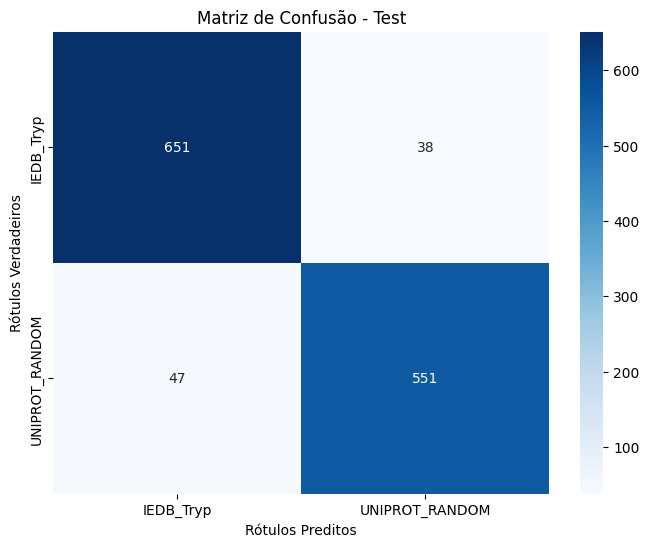

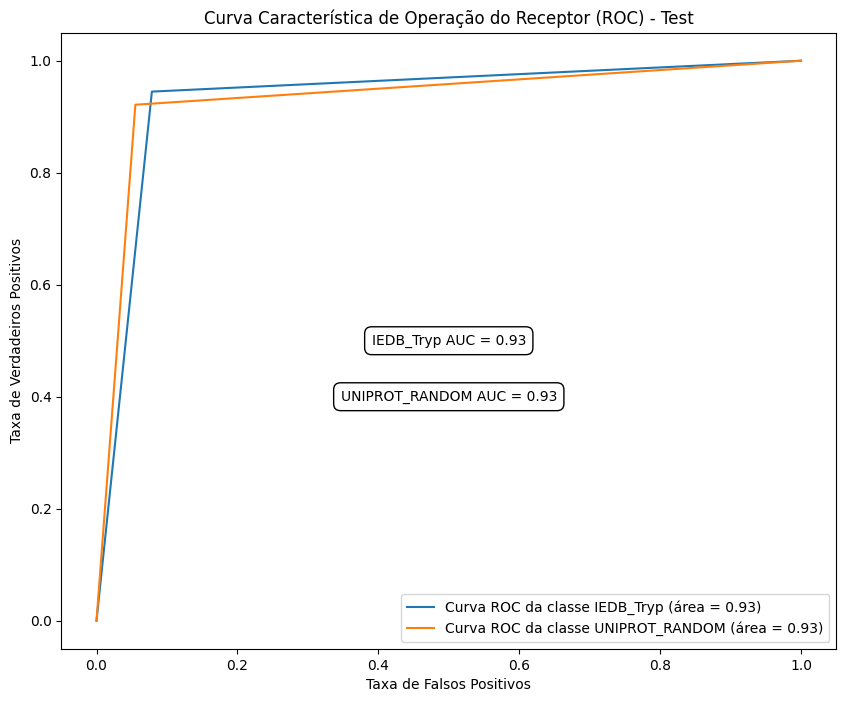


### Métricas para Training ###
Acurácia: 1.0
Recall (Sensibilidade) para 'IEDB_Tryp': 1.0
Recall (Sensibilidade) para 'UNIPROT_RANDOM': 1.0
F1-Score: 1.0
Precisão: 1.0
AUC: 1.0
MCC: 1.0


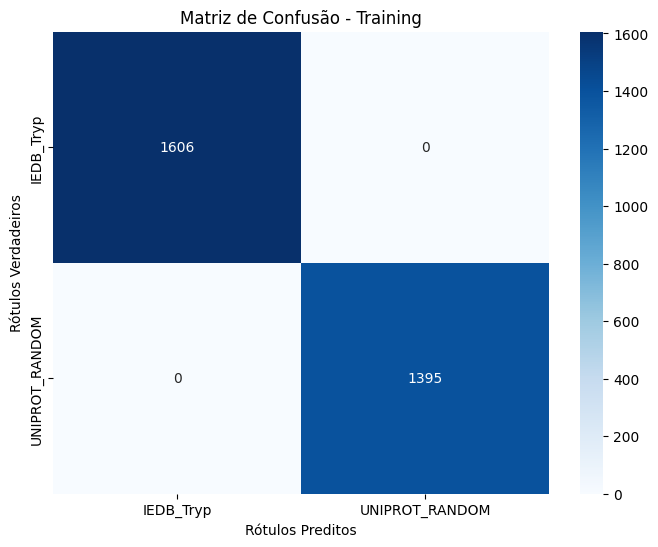

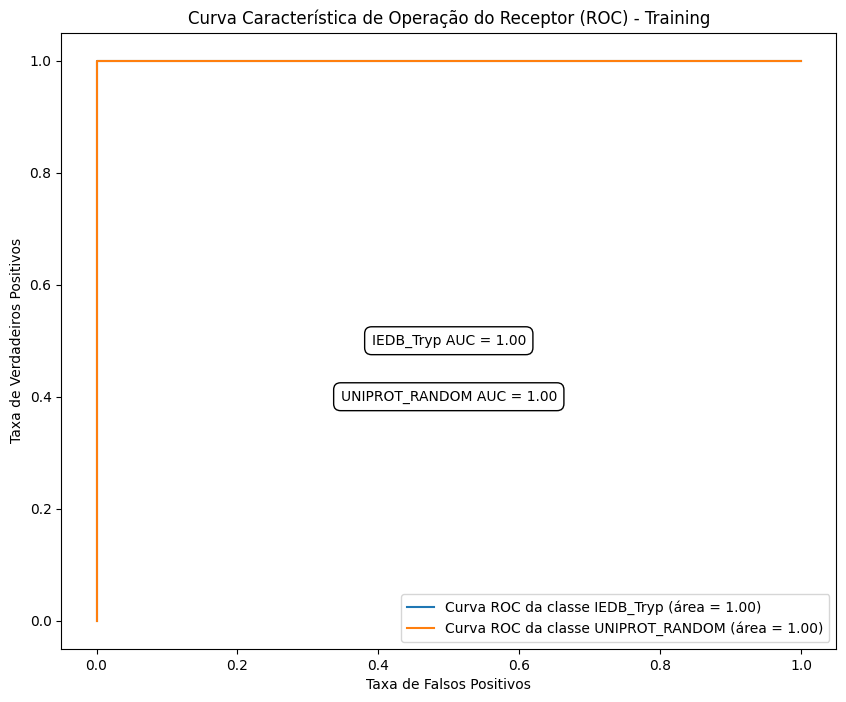

In [101]:
if __name__ == "__main__":
    file_path = "dataset.csv"
    X_train, X_test, y_train, y_test, label_encoder = load_dataset(file_path)

    # Criar e treinar o modelo
    model = DecisionTree()
    model.train(X_train, y_train, 20)

    # Fazer previsões e calcular probabilidades para o conjunto de teste
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)

    # Avaliar o modelo no conjunto de teste
    evaluate(y_test, y_pred_test, y_prob_test, class_names, label_encoder, "Test")

    # Fazer previsões e calcular probabilidades para o conjunto de treinamento
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)

    # Avaliar o modelo no conjunto de treinamento
    evaluate(y_train, y_pred_train, y_prob_train, class_names, label_encoder, "Training")

In [102]:
!pip install graphviz

In [103]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = tree.export_graphviz(model.model, out_file=None, feature_names=feature_names,
                              class_names=class_names, filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree")
graph.view()

'decision_tree.png'